In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import time
import re
import numpy as np
import spacy
import pickle

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import (
    PlaintextCorpusReader,
    CategorizedPlaintextCorpusReader,
)
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns

<IPython.core.display.Javascript object>

In [ ]:
tracks = pd.read_csv("data/tracks_with_lyrics.csv", index_col=0)

This data has been gathered by me over the course of the boot camp. I did an unsupervised learning project comparing the frequency spectrum between songs. Originally I used solely the Spotify API to gather data. I used the lyric genius api to gather lyrics on as many songs as I could. I then used the google translate API to tag the languages. A lot of work needs to be done before I can use nlp on multiple languages but this notebook only uses songs that were tagged as english.

In [4]:
tracks["lang"]

0         en
1         en
2         en
3         en
4         en
        ... 
13066     ko
13067     ko
13068     ko
13069    NaN
13070     ko
Name: lang, Length: 13071, dtype: object

<IPython.core.display.Javascript object>

In [5]:
lyr_tracks = tracks[
    ((tracks["lyrics"].isna() == False) & (tracks["lang"] == "en"))
].reset_index()

<IPython.core.display.Javascript object>

In [6]:
px_df = lyr_tracks[["lyrics", "lang", "id", "genres"]]

<IPython.core.display.Javascript object>

In [7]:
docs = [l.replace("\n", " ") for l in lyr_tracks["lyrics"]]

<IPython.core.display.Javascript object>

In [8]:
docs = [re.sub("r'\[.*?\]|(?i)\[[a-z]+ [0-9]+\]|\[[a-z]+\]'", " ", doc) for doc in docs]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Flags not at the start of the expression "r'\\[.*?\\]|(?i)\\[[a-z" (truncated)
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [9]:
# for doc in docs:
#     print(re.findall(r'\[(?:[^|\]]*\|)?([^\]]*)]', doc))

<IPython.core.display.Javascript object>

In [10]:
# for doc in docs:
#     print(re.findall('(?i)\[[a-z]+ [0-9]+\]|\[[a-z]+\]', doc))


<IPython.core.display.Javascript object>

In [11]:
# for doc in docs:
#     print(re.findall(r'\[.*?\]|(?i)\[[a-z]+ [0-9]+\]|\[[a-z]+\]', doc))


<IPython.core.display.Javascript object>

In [12]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("english")
    preprocessed = []

    for doc in docs:
        tokenized = word_tokenize(doc)

        cleaned = [
            stemmer.stem(lemmatizer.lemmatize(token.lower()))
            for token in tokenized
            if not token.lower() in stopwords.words("english")
            if token.isalpha()
        ]
        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)

    return preprocessed

<IPython.core.display.Javascript object>

In [49]:
#----------------------------------------------------------------------------
#This is the process I used to clean the docs. It takes forever so I saved it to a pickle
#--------------------------------------------------------------------------------------

# preprocessed = preprocess(docs)

# with open("data/preprocessed.pickle", "wb") as f:
#     pickle.dump(preprocessed, f)

<IPython.core.display.Javascript object>

In [50]:
with open("data/preprocessed.pickle", "rb") as f:
    preprocessed = pickle.load(f)

<IPython.core.display.Javascript object>

In [51]:
tfidf = TfidfVectorizer(min_df=2)
vectorized = tfidf.fit_transform(preprocessed)

<IPython.core.display.Javascript object>

In [15]:
tfidf_df = pd.DataFrame(vectorized.toarray(), columns=tfidf.get_feature_names())

<IPython.core.display.Javascript object>

In [16]:
tfidf_df
#the program I used to tag the language got some of it wrong so 
#there needs to be some more data cleaning earlier on in the process.


,aa,aaa,aaaaaaaaaaaaaaaaaaaw,aaaah,aaaahhh,aaahhhh,aah,aahhh,aak,aalegra,...,자꾸,절대,중독,지금,표정,품에,피터팬,하나,혹시,흐린
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12522
7254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
7255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
7256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warni

KElbowVisualizer(ax=<AxesSubplot:>, k=None, metric='silhouette', model=None)

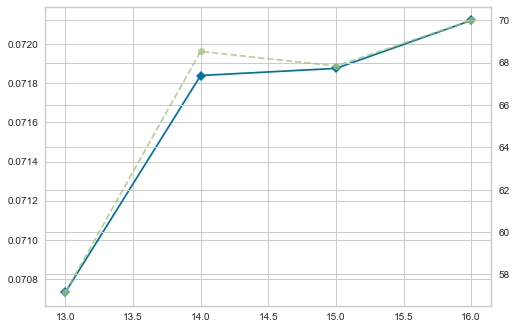

<IPython.core.display.Javascript object>

In [53]:
#this also takes awhile so run at your own risk
#originally this dataset was used in unsupervised learning on different parameters
#clustered into 29 before.
#-------------------------

# model = KMeans(n_jobs=-1)
# visualizer = KElbowVisualizer(model=model, k=(13, 17), metric="silhouette",)

# visualizer.fit(tfidf_df)

In [32]:
model = KMeans(n_clusters=17, n_jobs=-1)
clusters = model.fit_predict(vectorized.toarray())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


<IPython.core.display.Javascript object>

In [33]:
px_df["clst_label"] = clusters

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [34]:
px_df["clst_label"].value_counts()

8     4094
1     1751
3      299
14     293
6      260
7      210
9      108
4       95
2       58
12      46
5       24
11       9
10       4
0        3
15       2
16       1
13       1
Name: clst_label, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
def get_keyword_counts(data):
    micro_genre_count = {}
    word_count = {}
    for x in data["genres"]:
        m_genres = x.split(", ")
        for m in m_genres:
            if m not in micro_genre_count:
                micro_genre_count[m] = 1
            else:
                micro_genre_count[m] += 1
            words = m.split(" ")
            for word in words:
                if word not in word_count:
                    word_count[word] = 1
                else:
                    word_count[word] += 1
    try:
        del micro_genre_count[""]
        del word_count[""]
    except:
        pass
    return micro_genre_count, word_count

<IPython.core.display.Javascript object>

In [37]:
px_df["genres"] = px_df["genres"].fillna("not listed")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [38]:
micro_genre_count, word_count = get_keyword_counts(px_df)

<IPython.core.display.Javascript object>

In [39]:
m_genre_series = pd.Series(micro_genre_count)
word_count_series = pd.Series(word_count)

<IPython.core.display.Javascript object>

In [40]:
whole_df_m_genre_rep = m_genre_series / px_df.shape[0]
whole_df_w_count_rep = word_count_series / px_df.shape[0]

<IPython.core.display.Javascript object>

In [41]:
clust_genre_dict = {}
clust_word_dict = {}
# this counts up every time a genre or a word shows up in a single cluster
for cl in px_df["clst_label"].unique():
    cluster_sub_df = px_df[px_df["clst_label"] == cl]
    micro_genre_count, word_count = get_keyword_counts(cluster_sub_df)

    m_genre_series = pd.Series(micro_genre_count)
    word_series = pd.Series(word_count)

    m_genre_rep = m_genre_series / cluster_sub_df.shape[0]
    w_count_rep = word_series / cluster_sub_df.shape[0]

    clust_genre_dict["cluster_" + str(cl)] = m_genre_rep
    clust_word_dict["cluster_" + str(cl)] = w_count_rep

<IPython.core.display.Javascript object>

In [42]:
cluster_genre_df = pd.DataFrame(clust_genre_dict)
cluster_keyword_df = pd.DataFrame(clust_word_dict)

<IPython.core.display.Javascript object>

In [43]:
all_top_7 = []
all_top_12 = []
for col in cluster_genre_df.columns:
    # find the 7 genres that occur most frequently in the cluster
    top_7_g = cluster_genre_df[col].sort_values(ascending=False)[0:7]
    # reference the index to find the values for the whole data frame
    top_7_comp = whole_df_m_genre_rep[top_7_g.index]
    print("Micro Genre Comparison")
    display(
        pd.DataFrame(
            [top_7_g, top_7_comp], index=[col, "df"]
        ).T.style.background_gradient(axis=1)
    )
    # store to help create another plotting df
    all_top_7 += list(top_7_g.index)
    top_12_w = cluster_keyword_df[col].sort_values(ascending=False)[0:12]
    top_12_comp = whole_df_w_count_rep[top_12_w.index]
    print("Keyword Comparison")
    display(
        pd.DataFrame(
            [top_12_w, top_12_comp], index=[col, "df"]
        ).T.style.background_gradient(axis=1)
    )
    all_top_12 += list(top_12_w.index)


# -----------------------------------------------------------------
# Here you can see the frequency a genre or genre keyword shows up in
# a single cluster vs the frequency it shows up in the whole dataframe
#certain genres pop up in a higher frequency than in the whole data frame
#implying that clusters are at least somewhat drawn on genre differentiation lines

Micro Genre Comparison


,cluster_6,df
pop,0.330769,0.170846
rap,0.315385,0.077983
dance pop,0.276923,0.121659
pop rap,0.265385,0.073298
trap,0.230769,0.041058
hip hop,0.153846,0.057316
melodic rap,0.146154,0.028934


Keyword Comparison


,cluster_6,df
pop,1.465385,0.949022
rap,1.088462,0.310003
hip,0.796154,0.274869
hop,0.761538,0.249931
trap,0.469231,0.084459
r&b,0.396154,0.139157
rock,0.376923,0.744282
dance,0.280769,0.181455
soul,0.238462,0.185864
atl,0.157692,0.024525


Micro Genre Comparison


,cluster_1,df
pop,0.278127,0.170846
dance pop,0.201599,0.121659
pop rap,0.113078,0.073298
post-teen pop,0.113078,0.060485
rap,0.111936,0.077983
urban contemporary,0.095374,0.054974
r&b,0.094803,0.052080


Keyword Comparison


,cluster_1,df
pop,1.305540,0.949022
rock,0.518561,0.744282
rap,0.447744,0.310003
hip,0.414620,0.274869
hop,0.370074,0.249931
r&b,0.250714,0.139157
dance,0.249001,0.181455
soul,0.219874,0.185864
country,0.214163,0.188068
indie,0.207310,0.285478


Micro Genre Comparison


,cluster_8,df
rock,0.135076,0.102508
pop,0.088911,0.170846
indie folk,0.082071,0.051392
modern rock,0.071324,0.058005
alternative rock,0.070347,0.050703
pop rock,0.069614,0.065445
indie pop,0.057157,0.040094


Keyword Comparison


,cluster_8,df
rock,0.957499,0.744282
pop,0.697606,0.949022
indie,0.367855,0.285478
folk,0.224475,0.146735
alternative,0.217636,0.184211
country,0.216659,0.188068
metal,0.214460,0.151832
punk,0.164387,0.124001
new,0.162433,0.137779
soul,0.157792,0.185864


Micro Genre Comparison


,cluster_14,df
pop,0.283276,0.170846
dance pop,0.204778,0.121659
urban contemporary,0.156997,0.054974
quiet storm,0.150171,0.044503
r&b,0.150171,0.052080
soul,0.150171,0.053320
motown,0.126280,0.041196


Keyword Comparison


,cluster_14,df
pop,1.266212,0.949022
rock,0.508532,0.744282
soul,0.406143,0.185864
dance,0.290102,0.181455
r&b,0.276451,0.139157
rap,0.221843,0.310003
hip,0.218430,0.274869
contemporary,0.218430,0.119868
indie,0.201365,0.285478
new,0.187713,0.137779


Micro Genre Comparison


,cluster_7,df
pop,0.376190,0.170846
dance pop,0.323810,0.121659
urban contemporary,0.147619,0.054974
pop rap,0.142857,0.073298
r&b,0.109524,0.052080
rap,0.100000,0.077983
rock,0.090476,0.102508


Keyword Comparison


,cluster_7,df
pop,1.557143,0.949022
rock,0.628571,0.744282
hip,0.400000,0.274869
rap,0.395238,0.310003
dance,0.376190,0.181455
hop,0.323810,0.249931
r&b,0.228571,0.139157
house,0.228571,0.105814
contemporary,0.214286,0.119868
indie,0.185714,0.285478


Micro Genre Comparison


,cluster_3,df
rap,0.501672,0.077983
hip hop,0.334448,0.057316
pop rap,0.324415,0.073298
trap,0.317726,0.041058
melodic rap,0.200669,0.028934
southern hip hop,0.200669,0.026867
canadian hip hop,0.167224,0.019014


Keyword Comparison


,cluster_3,df
rap,1.819398,0.310003
hip,1.521739,0.274869
hop,1.464883,0.249931
pop,0.802676,0.949022
trap,0.635452,0.084459
drill,0.234114,0.015569
melodic,0.200669,0.059245
southern,0.200669,0.042436
canadian,0.193980,0.068063
atl,0.187291,0.024525


Micro Genre Comparison


,cluster_9,df
pop,0.351852,0.170846
dance pop,0.305556,0.121659
r&b,0.175926,0.052080
post-teen pop,0.175926,0.060485
urban contemporary,0.166667,0.054974
rap,0.129630,0.077983
pop rap,0.120370,0.073298


Keyword Comparison


,cluster_9,df
pop,1.574074,0.949022
rock,0.546296,0.744282
hip,0.435185,0.274869
r&b,0.425926,0.139157
dance,0.379630,0.181455
hop,0.333333,0.249931
rap,0.333333,0.310003
soul,0.296296,0.185864
indie,0.277778,0.285478
contemporary,0.194444,0.119868


Micro Genre Comparison


,cluster_4,df
pop,0.326316,0.170846
rap,0.252632,0.077983
dance pop,0.252632,0.121659
hip hop,0.200000,0.057316
pop rap,0.189474,0.073298
post-teen pop,0.126316,0.060485
hip pop,0.105263,0.024249


Keyword Comparison


,cluster_4,df
pop,1.431579,0.949022
rap,0.747368,0.310003
hip,0.715789,0.274869
hop,0.600000,0.249931
rock,0.578947,0.744282
dance,0.305263,0.181455
soul,0.252632,0.185864
trap,0.221053,0.084459
r&b,0.200000,0.139157
funk,0.189474,0.090934


Micro Genre Comparison


,cluster_5,df
pop,0.500000,0.170846
dance pop,0.458333,0.121659
urban contemporary,0.291667,0.054974
r&b,0.291667,0.052080
trap,0.250000,0.041058
rap,0.250000,0.077983
pop rap,0.208333,0.073298


Keyword Comparison


,cluster_5,df
pop,1.833333,0.949022
hip,0.791667,0.274869
rap,0.750000,0.310003
hop,0.625000,0.249931
dance,0.541667,0.181455
r&b,0.458333,0.139157
rock,0.416667,0.744282
contemporary,0.291667,0.119868
urban,0.291667,0.054974
trap,0.250000,0.084459


Micro Genre Comparison


,cluster_2,df
dancehall,0.879310,0.023422
reggae fusion,0.534483,0.013916
modern reggae,0.413793,0.015293
soca,0.172414,0.002756
lovers rock,0.137931,0.009093
uk dancehall,0.103448,0.003031
pop rap,0.068966,0.073298


Keyword Comparison


,cluster_2,df
reggae,1.086207,0.060347
dancehall,1.034483,0.037889
fusion,0.534483,0.022045
modern,0.413793,0.126481
pop,0.241379,0.949022
hop,0.206897,0.249931
hip,0.206897,0.274869
uk,0.172414,0.062138
soca,0.172414,0.002756
lovers,0.137931,0.009093


Micro Genre Comparison


,cluster_12,df
dance pop,0.260870,0.121659
pop,0.260870,0.170846
soul,0.239130,0.053320
funk,0.239130,0.048636
pop rap,0.217391,0.073298
hip hop,0.195652,0.057316
rap,0.152174,0.077983


Keyword Comparison


,cluster_12,df
pop,1.195652,0.949022
hip,0.826087,0.274869
hop,0.717391,0.249931
rap,0.717391,0.310003
rock,0.413043,0.744282
soul,0.391304,0.185864
funk,0.347826,0.090934
dance,0.304348,0.181455
house,0.239130,0.105814
metal,0.195652,0.151832


Micro Genre Comparison


,cluster_15,df
southern soul,1.000000,0.013089
soul,1.000000,0.053320
soft rock,1.000000,0.033894
quiet storm,1.000000,0.044503
philly soul,1.000000,0.001378
motown,1.000000,0.041196
funk,1.000000,0.048636


Keyword Comparison


,cluster_15,df
soul,4.000000,0.185864
storm,1.000000,0.044503
southern,1.000000,0.042436
soft,1.000000,0.033894
rock,1.000000,0.744282
quiet,1.000000,0.044503
philly,1.000000,0.005649
motown,1.000000,0.041334
funk,1.000000,0.090934
disco,1.000000,0.026040


Micro Genre Comparison


,cluster_11,df
rock,0.555556,0.102508
classic rock,0.444444,0.032654
dance rock,0.444444,0.031276
art rock,0.444444,0.025351
post-punk,0.333333,0.011160
folk rock,0.333333,0.031276
folk,0.333333,0.019151


Keyword Comparison


,cluster_11,df
rock,3.777778,0.744282
folk,0.777778,0.146735
art,0.555556,0.047534
wave,0.444444,0.084872
classic,0.444444,0.078672
dance,0.444444,0.181455
alternative,0.333333,0.184211
post-punk,0.333333,0.016120
pop,0.333333,0.949022
mellow,0.222222,0.069854


Micro Genre Comparison


,cluster_0,df
hip hop,0.666667,0.057316
roots reggae,0.333333,0.009920
reggae fusion,0.333333,0.013916
reggae,0.333333,0.013640
new wave pop,0.333333,0.023009
modern reggae,0.333333,0.015293
dub,0.333333,0.005236


Keyword Comparison


,cluster_0,df
reggae,1.333333,0.060347
pop,0.666667,0.949022
hop,0.666667,0.249931
hip,0.666667,0.274869
wave,0.333333,0.084872
roots,0.333333,0.029347
new,0.333333,0.137779
modern,0.333333,0.126481
fusion,0.333333,0.022045
dub,0.333333,0.005236


Micro Genre Comparison


,cluster_16,df
reggae fusion,1.000000,0.013916
"""australian children's music""",nan,0.000138
"""black 'n' roll""",nan,0.000138
"""canadian children's music""",nan,0.000413
"""children's folk""",nan,0.001516
"""children's music""",nan,0.003444
"""children's story""",nan,0.000138


Keyword Comparison


,cluster_16,df
reggae,1.000000,0.060347
fusion,1.000000,0.022045
"""australian",nan,0.000138
"""black",nan,0.000138
"""canadian",nan,0.000413
"""children's",nan,0.005098
"""death",nan,0.000138
"""punk",nan,0.000551
"""women's",nan,0.000964
'n',nan,0.000827


Micro Genre Comparison


,cluster_10,df
urban contemporary,0.250000,0.054974
p funk,0.250000,0.001240
atl hip hop,0.250000,0.019427
brooklyn drill,0.250000,0.005787
dance pop,0.250000,0.121659
funk,0.250000,0.048636
gangster rap,0.250000,0.015982


Keyword Comparison


,cluster_10,df
rap,1.000000,0.310003
funk,0.750000,0.090934
hip,0.750000,0.274869
hop,0.750000,0.249931
pop,0.750000,0.949022
urban,0.250000,0.054974
motown,0.250000,0.041334
atl,0.250000,0.024525
brooklyn,0.250000,0.008129
contemporary,0.250000,0.119868


Micro Genre Comparison


,cluster_13,df
soca,1.000000,0.002756
riddim,1.000000,0.001653
reggae fusion,1.000000,0.013916
modern reggae,1.000000,0.015293
dancehall,1.000000,0.023422
"""australian children's music""",nan,0.000138
"""black 'n' roll""",nan,0.000138


Keyword Comparison


,cluster_13,df
reggae,2.000000,0.060347
soca,1.000000,0.002756
riddim,1.000000,0.001653
modern,1.000000,0.126481
fusion,1.000000,0.022045
dancehall,1.000000,0.037889
"""australian",nan,0.000138
"""black",nan,0.000138
"""canadian",nan,0.000413
"""children's",nan,0.005098


<IPython.core.display.Javascript object>

In [46]:
num_keywords = 5
num_topics = 17

<IPython.core.display.Javascript object>

In [47]:
vectorizer = CountVectorizer()
model = LatentDirichletAllocation(n_components=num_topics, learning_method="online")

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [
    [
        (vectorizer.get_feature_names()[i], topic[i])
        for i in topic.argsort()[: -num_keywords - 1 : -1]
    ]
    for topic in model.components_
]

topics = [[x[0] for x in i] for i in results]
topics

[['know', 'think', 'want', 'could', 'tell'],
 ['shake', 'doo', 'king', 'queen', 'shout'],
 ['yuh', 'littl', 'mind', 'dead', 'version'],
 ['da', 'ye', 'men', 'yea', 'mo'],
 ['la', 'eh', 'rain', 'yo', 'de'],
 ['na', 'wan', 'gon', 'get', 'danc'],
 ['yeah', 'oh', 'love', 'babi', 'got'],
 ['ah', 'hot', 'funk', 'air', 'wave'],
 ['nobodi', 'kid', 'xoxo', 'solo', 'paul'],
 ['mi', 'dem', 'di', 'fi', 'nuh'],
 ['dey', 'peopl', 'boogi', 'worri', 'must'],
 ['woo', 'worldboss', 'mr', 'fling', 'halba'],
 ['one', 'day', 'instrument', 'follow', 'bless'],
 ['life', 'lie', 'power', 'gim', 'dog'],
 ['like', 'got', 'nigga', 'get', 'yeah'],
 ['go', 'back', 'man', 'run', 'come'],
 ['chorus', 'love', 'never', 'feel', 'heart']]

<IPython.core.display.Javascript object>

In [ ]:
# pardon the profanity. A lot of filler words that need to be cleaned out.